In [1]:
import pandas as pd
import numpy as np
import os

## Aggregated features

In [2]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths


def action_potentials(X,aplimit=-20):
  action_potentials = []
  ap_amps = []
  widths = []
  widths_plotting = []

  for x in X:
    peaks,d = find_peaks(x, height=aplimit)
    if len(peaks)>0:
      ap_amps.append(d['peak_heights'])
    else:
      ap_amps.append(np.array([]))

    results_half = peak_widths(x, peaks, rel_height=0.5)
    widths.append(results_half[0])  # widths
    widths_plotting.append(results_half[1:])
    
    
    action_potentials.append(peaks)
  return np.array(action_potentials),np.array(ap_amps),np.array(widths),np.array(widths_plotting)

## Aggregated features from membrane potentials 

In [3]:
PHN_df = pd.read_csv("Y_data_voltage.csv")

In [4]:
PHN_df.drop("Unnamed: 0", axis=1, inplace= True)
PHN_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-80.50146,-73.620314,-67.357399,-61.382787,-54.541782,17.816059,58.881427,53.758364,47.125866,41.577130,...,8.093526,14.233536,17.883338,19.989153,21.158979,21.758281,22.005953,22.033896,21.922441,21.721304
1,-80.50146,-74.765668,-68.713439,-62.584872,-55.838068,-25.933030,46.183495,38.722102,28.631157,21.391622,...,-20.079739,-20.281990,-20.482540,-20.681184,-20.877728,-21.071989,-21.263794,-21.452982,-21.639399,-21.822900
2,-80.50146,-75.313260,-70.198321,-65.071257,-59.815601,-53.775142,-34.425259,34.122383,34.104529,26.182478,...,-86.948376,-86.950726,-86.953046,-86.955339,-86.957603,-86.959839,-86.962048,-86.964230,-86.966386,-86.968515
3,-80.50146,-75.194863,-70.074919,-64.978059,-59.594462,-51.542387,37.589030,41.796535,34.684865,28.438937,...,-3.277842,-3.286780,-3.295097,-3.302810,-3.309936,-3.316489,-3.322486,-3.327945,-3.332881,-3.337310
4,-80.50146,-74.804201,-68.759999,-62.434073,-55.279696,-8.992941,57.832149,56.728695,53.429818,50.690608,...,-72.233335,-72.637223,-73.041176,-73.444834,-73.847821,-74.249752,-74.650228,-75.048845,-75.445191,-75.838848


In [5]:
%%time
Hap,Hamp,Hapw,Hapwpl = action_potentials(PHN_df.values)

Wall time: 431 ms


In [6]:
PHN_df = PHN_df.values

Text(0.5, 1.0, '2 action potentials')

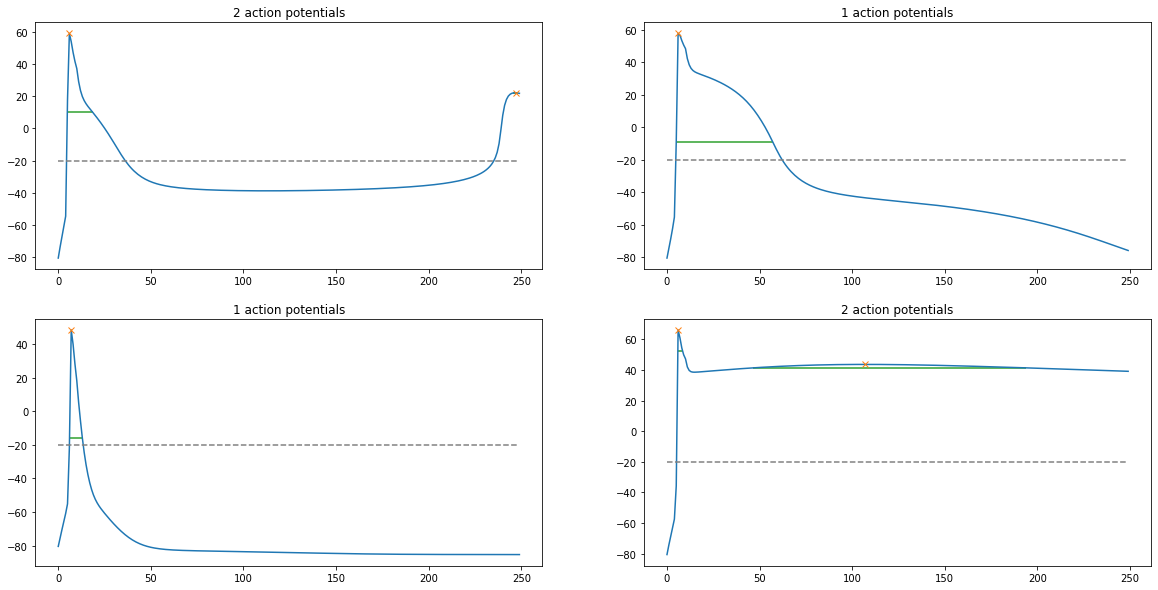

In [7]:
import matplotlib.pyplot as plt
aplimit = np.zeros((250,1))-20


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ind=0
plt.plot(PHN_df[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")


plt.title(str(len(Hap[ind])) + ' action potentials')

plt.subplot(2,2,2)
ind=4
plt.plot(PHN_df[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")

plt.title(str(len(Hap[ind])) + ' action potentials')

plt.subplot(2,2,3)
ind=123
plt.plot(PHN_df[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")

plt.title(str(len(Hap[ind])) + ' action potentials')


plt.subplot(2,2,4)
ind=234
plt.plot(PHN_df[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")

plt.title(str(len(Hap[ind])) + ' action potentials')




In [8]:
Hap,Hamp,Hapw,Hapwpl

n_ap = np.array([len(hap) for hap in Hap])
first_aptime = np.array([hap[0] if len(hap)>0 else np.nan for hap in Hap])
first_apamp = np.array([hamp[0] if len(hamp)>0 else np.nan for hamp in Hamp])
first_apwidth = np.array([hapw[0] if len(hapw)>0 else np.nan for hapw in Hapw])

PHN_ag_df = pd.DataFrame(n_ap,columns=['n_ap'])
PHN_ag_df['first_ap_time'] = first_aptime
PHN_ag_df['first_ap_amp'] = first_apamp
PHN_ag_df['first_ap_width'] = first_apwidth

In [9]:
PHN_ag_df.shape

(5344, 4)

In [10]:
PHN_ag_df.tail(50)

,n_ap,first_ap_time,first_ap_amp,first_ap_width
5294,1,7,32.313867,8.400099
5295,2,9,56.712953,46.906338
5296,3,6,50.359158,6.634176
5297,1,7,46.145458,8.023277
5298,1,7,48.789648,20.191886
5299,1,7,36.502745,9.349253
5300,1,7,53.225964,27.328526
5301,1,7,45.180526,14.097986
5302,1,6,57.400875,17.947593
5303,1,7,44.416228,7.673505


In [11]:
PHN_ag_df.describe()

,n_ap,first_ap_time,first_ap_amp,first_ap_width
count,5344.000000,5344.000000,5344.000000,5344.000000
mean,1.371257,6.710142,48.978495,22.235089
std,0.637793,0.774864,7.186675,29.918100
min,1.000000,4.000000,24.989149,1.389437
25%,1.000000,6.000000,43.699011,7.294069
50%,1.000000,7.000000,48.929888,11.662020
75%,2.000000,7.000000,54.402837,22.014264
max,6.000000,10.000000,69.403963,207.254010


## Aggregated to csv

In [13]:
PHN_ag_df.to_csv("PHN_aggregatd.csv")

In [14]:
import matplotlib.pyplot as plt

In [15]:
x_axis = [i*0.025 for i in range(250)]

In [16]:
PHN_df

array([[-80.50146   , -73.62031358, -67.3573989 , ...,  22.03389591,
         21.92244107,  21.72130362],
       [-80.50146   , -74.765668  , -68.7134393 , ..., -21.45298201,
        -21.63939859, -21.82290028],
       [-80.50146   , -75.31326005, -70.19832124, ..., -86.96423027,
        -86.96638576, -86.96851506],
       ...,
       [-80.50146   , -73.77445085, -67.73631539, ..., -70.69865708,
        -70.6986579 , -70.69865841],
       [-80.50146   , -73.90002704, -68.27030091, ..., -73.17371073,
        -73.18285304, -73.1919337 ],
       [-80.50146   , -73.37867485, -67.22586075, ..., -69.28454601,
        -69.28662905, -69.28868833]])

Wall time: 42.9 ms


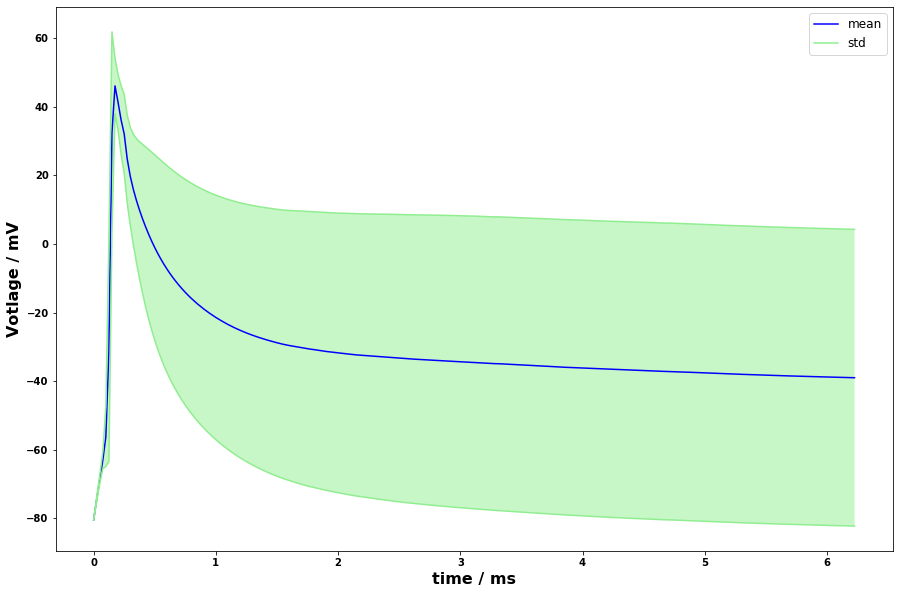

In [17]:
%%time
import matplotlib
matplotlib.rcParams.update({'legend.fontsize':12})

fig = plt.figure(figsize=(15,10))
mu = np.mean(PHN_df,axis=0)
std = np.std(PHN_df,axis=0)

upper = mu+std
lower = mu-std

plt.plot(x_axis,mu,'b',label='mean')
plt.plot(x_axis,upper,'lightgreen',alpha=1,label='std')
plt.plot(x_axis,lower,'lightgreen',alpha=1)
plt.fill_between(x_axis,lower,upper,facecolor='lightgreen',alpha=0.5) ;
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
plt.xlabel('time / ms', fontsize=16, fontweight='bold')
plt.ylabel('Votlage / mV', fontsize=16, fontweight='bold')
plt.legend()

In [38]:
aa = pd.read_csv("Y_data_voltage.csv")

In [39]:
aa.drop("Unnamed: 0", axis=1, inplace=True)

In [40]:
aa

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-80.50146,-73.620314,-67.357399,-61.382787,-54.541782,17.816059,58.881427,53.758364,47.125866,41.577130,...,8.093526,14.233536,17.883338,19.989153,21.158979,21.758281,22.005953,22.033896,21.922441,21.721304
1,-80.50146,-74.765668,-68.713439,-62.584872,-55.838068,-25.933030,46.183495,38.722102,28.631157,21.391622,...,-20.079739,-20.281990,-20.482540,-20.681184,-20.877728,-21.071989,-21.263794,-21.452982,-21.639399,-21.822900
2,-80.50146,-75.313260,-70.198321,-65.071257,-59.815601,-53.775142,-34.425259,34.122383,34.104529,26.182478,...,-86.948376,-86.950726,-86.953046,-86.955339,-86.957603,-86.959839,-86.962048,-86.964230,-86.966386,-86.968515
3,-80.50146,-75.194863,-70.074919,-64.978059,-59.594462,-51.542387,37.589030,41.796535,34.684865,28.438937,...,-3.277842,-3.286780,-3.295097,-3.302810,-3.309936,-3.316489,-3.322486,-3.327945,-3.332881,-3.337310
4,-80.50146,-74.804201,-68.759999,-62.434073,-55.279696,-8.992941,57.832149,56.728695,53.429818,50.690608,...,-72.233335,-72.637223,-73.041176,-73.444834,-73.847821,-74.249752,-74.650228,-75.048845,-75.445191,-75.838848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,-80.50146,-74.539389,-68.691773,-62.852965,-56.732048,-46.819963,34.833818,42.798500,37.444791,31.481640,...,-4.694849,-4.892568,-5.092432,-5.294485,-5.498762,-5.705294,-5.914104,-6.125207,-6.338606,-6.554296
5340,-80.50146,-74.946544,-69.958875,-65.247660,-60.515719,-54.716446,-3.932562,52.140596,43.166902,34.589082,...,-79.789095,-79.794977,-79.800800,-79.806565,-79.812273,-79.817925,-79.823521,-79.829062,-79.834550,-79.839984
5341,-80.50146,-73.774451,-67.736315,-62.082204,-56.215736,-42.959873,46.504127,46.796831,37.706860,28.899318,...,-70.698642,-70.698645,-70.698648,-70.698650,-70.698653,-70.698654,-70.698656,-70.698657,-70.698658,-70.698658
5342,-80.50146,-73.900027,-68.270301,-63.185353,-58.049697,-48.268372,51.742084,53.797265,48.394088,42.877236,...,-73.107995,-73.117567,-73.127077,-73.136526,-73.145914,-73.155241,-73.164507,-73.173711,-73.182853,-73.191934


In [43]:
aa= aa.to_numpy()

Wall time: 1.88 s


Text(0, 0.5, 'Votlage / mV')

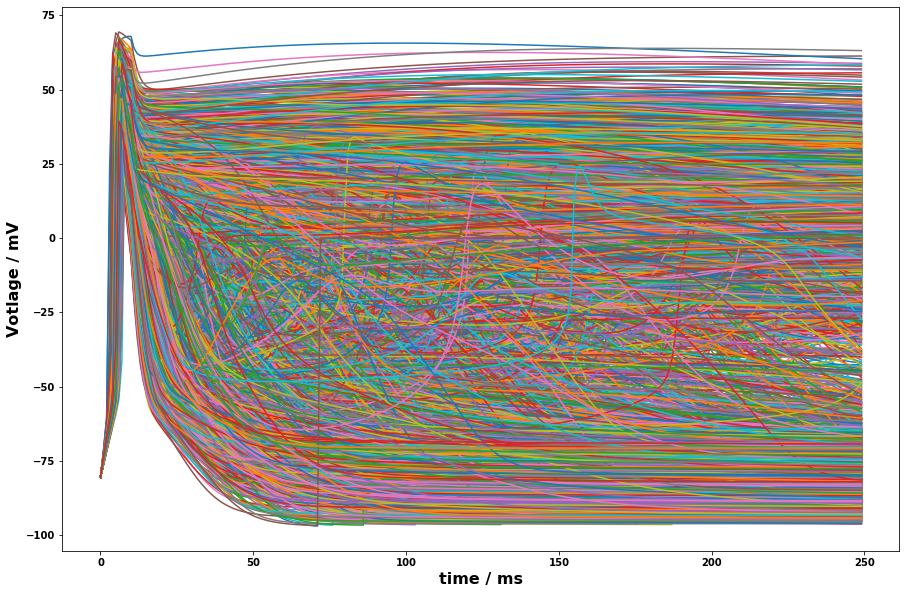

In [44]:
%%time
fig = plt.figure(figsize=(15,10))
x_axis = [i for i in range(250)]
plt.plot(x_axis,aa[:,:].T);
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
plt.xlabel('time / ms', fontsize=16, fontweight='bold')
plt.ylabel('Votlage / mV', fontsize=16, fontweight='bold')

Text(-0.1, 1.1, 'B')

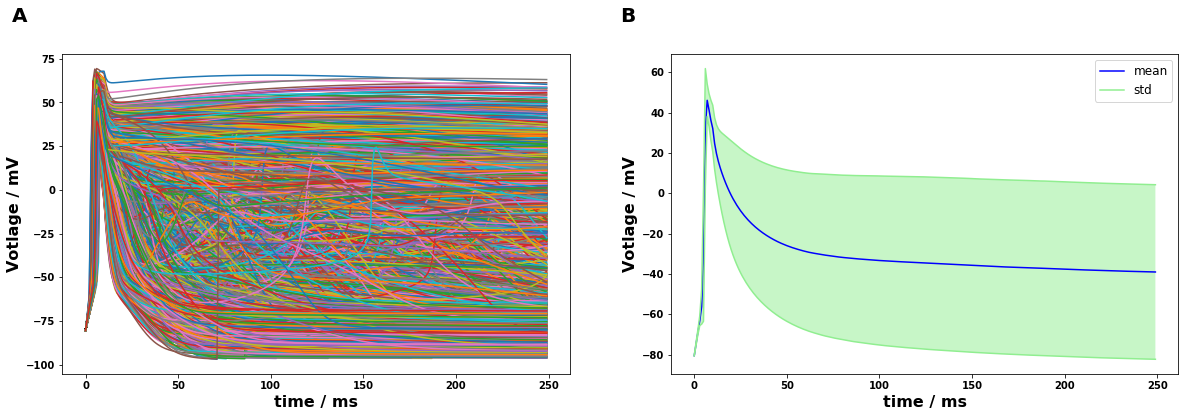

In [49]:
import string
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
x_axis = [i for i in range(250)]
plt.plot(x_axis,aa[:,:].T);
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
plt.xlabel('time / ms', fontsize=16, fontweight='bold')
plt.ylabel('Votlage / mV', fontsize=16, fontweight='bold')

ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')


plt.subplot(3,2,2)

mu = np.mean(PHN_df,axis=0)
std = np.std(PHN_df,axis=0)

upper = mu+std
lower = mu-std

plt.plot(x_axis,mu,'b',label='mean')
plt.plot(x_axis,upper,'lightgreen',alpha=1,label='std')
plt.plot(x_axis,lower,'lightgreen',alpha=1)
plt.fill_between(x_axis,lower,upper,facecolor='lightgreen',alpha=0.5) ;
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
plt.xlabel('time / ms', fontsize=16, fontweight='bold')
plt.ylabel('Votlage / mV', fontsize=16, fontweight='bold')
plt.legend()


ax = plt.gca()
ax.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')
